In [1]:
from dynamic_object_detection.learned.dataloader import FLOROSDataset

import matplotlib.pyplot as plt

Dataset length: 5883


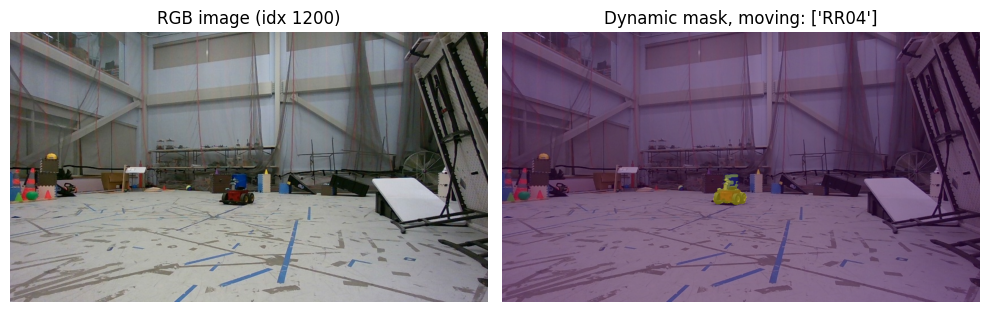

In [2]:
img_bag_path = "/home/andyli/acl/floros/data/highbay_main_data/"
pose_bag_path = "/home/andyli/acl/floros/data/highbay_main_vicon/"

rgb_image_topic = "/camera/camera/color/image_raw/compressed"
rgb_image_info_topic = "/camera/camera/color/camera_info"

pose_topic = "/HUSKY_LEWIS/world"

obstacle_robots_config = {
    "SCOUT1": {"pose_topic": "/SCOUT1/world", "dims": (0.5, 0.5, 0.5)},
    "RR04":   {"pose_topic": "/RR04/world",   "dims": (0.5, 0.5, 0.4)},
}

dataset = FLOROSDataset(
    img_bag_path=img_bag_path,
    pose_bag_path=pose_bag_path,
    rgb_image_topic=rgb_image_topic,
    rgb_image_info_topic=rgb_image_info_topic,
    pose_topic=pose_topic,
    obstacle_robots_config=obstacle_robots_config,
    cam_offset_z=0.15,
    time_tol=0.05,
    vel_dt=0.1,
    speed_threshold=0.1,
    cache_dir=None,
    # cache_dir="/home/andyli/acl/floros/dynamic-object-detection/learned/.floros_cache",
)
print("Dataset length:", len(dataset))


def show_sample(sample_idx):
    sample = dataset[sample_idx]
    img = sample["image"].permute(1, 2, 0).numpy()
    mask = sample["mask"][0].numpy()
    moving = sample["moving_robots"]

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title(f"RGB image (idx {sample_idx})")
    plt.imshow(img)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title(f"Dynamic mask, moving: {moving}")
    plt.imshow(img)
    plt.imshow(mask, alpha=0.4)
    plt.axis("off")
    plt.tight_layout()
    plt.show()


show_sample(1200)


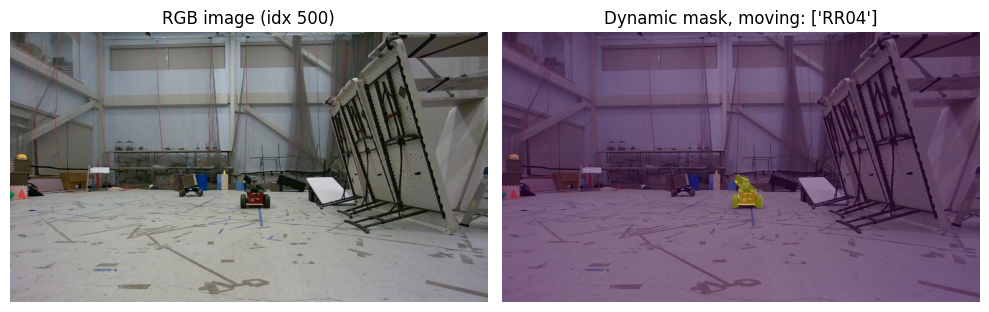

In [6]:
show_sample(500)
